# Project 2: Investigate a Dataset

*by Dieter Annys*

---

In [1]:
# Importing libraries
%matplotlib inline
# %pdb
from IPython.display import display
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from math import sqrt, isnan

## Dataset

This project is based on the **Titanic Dataset**

The following is a first look at the set
- counting the records
- displaying the top of the dataframe to get a feel for what the data looks like
- looking at the column descriptions

In [2]:
# Importing the dataset
titanic = pd.read_csv("titanic-data.csv")
print("There are {} datapoints in this dataset.".format(len(titanic.index)))
titanic.head()

There are 891 datapoints in this dataset.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Column descriptions copied from Kaggle:

    survival        Survival
                    (0 = No; 1 = Yes)
    pclass          Passenger Class
                    (1 = 1st; 2 = 2nd; 3 = 3rd)
    name            Name
    sex             Sex
    age             Age
    sibsp           Number of Siblings/Spouses Aboard
    parch           Number of Parents/Children Aboard
    ticket          Ticket Number
    fare            Passenger Fare
    cabin           Cabin
    embarked        Port of Embarkation
                    (C = Cherbourg; Q = Queenstown; S = Southampton)

    SPECIAL NOTES:
    Pclass is a proxy for socio-economic status (SES)
     1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

    Age is in Years; Fractional if Age less than One (1)
     If the Age is Estimated, it is in the form xx.5

    With respect to the family relation variables (i.e. sibsp and parch)
    some relations were ignored.  The following are the definitions used
    for sibsp and parch.

    Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
    Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
    Parent:   Mother or Father of Passenger Aboard Titanic
    Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

    Other family relatives excluded from this study include cousins,
    nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
    only with a nanny, therefore parch=0 for them.  As well, some
    travelled with very close friends or neighbors in a village, however,
    the definitions do not support such relations.

## First Questions

While looking at the information above, these were the questions that sprung to mind

- Women and children first: did a higher percentage of women and people below a certain age survive versus survivel percentage in adult males?

- Did having 'people to worry about' influence survival rate? How about parents/children vs siblings/spouses? Or more specifically, people with 0 siblings/spouses but 1 or more parents/children, or vice versa.

- What is the age distribution for women on board who are married vs unmarried?

## Data Wrangling

I'll perform the following operations on the dataset:

- Split the Name into 4 new columns: title, first_names, last_name, extra_names
- Split off the ticket number from Ticket
- Create a new column called Family, adding up SibSp and Parch

In [3]:
# Split name into title, first_names, last_name, extra_names
def split_name(name):
    # Extra names is the part in parentheses. If present, put this part in extra_names
    if "(" in name:
        name = name.split("(")
        extra_names = name[1].replace(")", "")
        name = name[0]
    else:
        extra_names = None
    name = name.split(",")
    last_name = name[0]
    name = name[1].strip().split(".", 1)
    if len(name) == 1:
        name.append("")
    title, first_names = name
    return title, first_names, last_name, extra_names

tmp_data = titanic["Name"].apply(split_name)
titanic["Title"] = tmp_data.apply(lambda x: x[0])
titanic["First_Names"] = tmp_data.apply(lambda x: x[1])
titanic["Last_Name"] = tmp_data.apply(lambda x: x[2])
titanic["Extra_Names"] = tmp_data.apply(lambda x: x[3])

In [4]:
# Get ticket number seperately to column ticket_nr
def split_ticket(ticket):
    ticket = ticket.split(" ")
    if ticket[-1].isdigit():
        return int(ticket[-1])
    return
    
titanic["Ticket_Nr"] = titanic["Ticket"].apply(split_ticket)

In [5]:
# Add a column Family adding up siblings, spouses, parents and children
titanic["Family"] = titanic["SibSp"] + titanic["Parch"]

In [6]:
# Looking at what the manipulated data looks like
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,First_Names,Last_Name,Extra_Names,Ticket_Nr,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Owen Harris,Braund,None,21171.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,John Bradley,Cumings,Florence Briggs Thayer,17599.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Laina,Heikkinen,None,3101282.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Jacques Heath,Futrelle,Lily May Peel,113803.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,William Henry,Allen,None,373450.0,0


### Missing Data

In [7]:
titanic.isnull().apply(pd.value_counts).loc[True].dropna()

Age            177.0
Cabin          687.0
Embarked         2.0
Extra_Names    748.0
Ticket_Nr        4.0
Name: True, dtype: float64

Here I am checking for NaNs in any of the columns and returning the amount of NaNs, if any are present.
- Columns Cabin and Extra_Names: this is normal, a lot of passengers did not have cabins or names in parentheses
- Age: when exploring data related to age, these will need to be filtered out. For example, later on, I will check whether a passenger is a child or not, and in that case, records without age should not be assigned anything.
- Ticket_Nr and Embarked: I'll check below which records these are exactly

In [8]:
titanic[titanic["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,First_Names,Last_Name,Extra_Names,Ticket_Nr,Family
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss,Amelie,Icard,None,113572.0,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs,George Nelson,Stone,Martha Evelyn,113572.0,0


A little research shows that both were traveling on the same ticket, one being the maid of the other. The fact that embarkation data is missing is a bit odd, because the research does show they both got on in Southampton.

In [9]:
titanic[titanic["Ticket_Nr"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,First_Names,Last_Name,Extra_Names,Ticket_Nr,Family
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,Mr,Lionel,Leonard,None,NaN,0
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,Mr,William Henry,Tornquist,None,NaN,0
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,Mr,William Cahoone Jr,Johnson,None,NaN,0
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,Mr,Alfred,Johnson,None,NaN,0


Research shows these were all workers for American Line, which explains the LINE ticket.

When sorting or grouping ticket numbers, it should be taken into account that these didn't have numbers.

## Data Exploration

### Survival by age

I start by exploring the age distribution amongs survivors vs non-survivors.

The next graph shows histograms of both the total age distribution (blue) and the age distribution of survivors (green).

During generation, records with missing age data are filtered out.

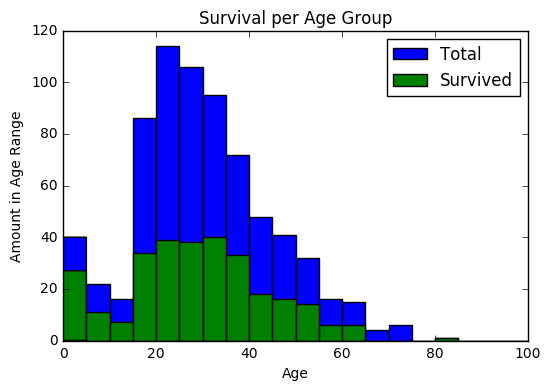

In [10]:
titanic_grp_survived = titanic.groupby("Survived")
returns = plt.hist(titanic[~titanic["Age"].apply(isnan)]["Age"], range=[0,100], bins=20, label="Total")

binned_ages_all = np.array(returns[0])
bins_ages = np.array(returns[1])

titanic_grp_survived_true = titanic_grp_survived.get_group(1)
returns = plt.hist(titanic_grp_survived_true[~titanic_grp_survived_true["Age"].apply(isnan)]["Age"], range=[0,100], bins=20, label="Survived")
binned_ages_survived = np.array(returns[0])

plt.title("Survival per Age Group")
plt.xlabel("Age")
plt.ylabel("Amount in Age Range")
plt.legend()

Obviously looking at any one age group and looking at how many survived, doesn't say much without looking at the numbers relative to the total amount of passengers within that age group. In the above graphs it is obvious there is a difference in relative survival rates. To make this clearer, the following graph shows survival rates proportional to total amount of subjects per age group.

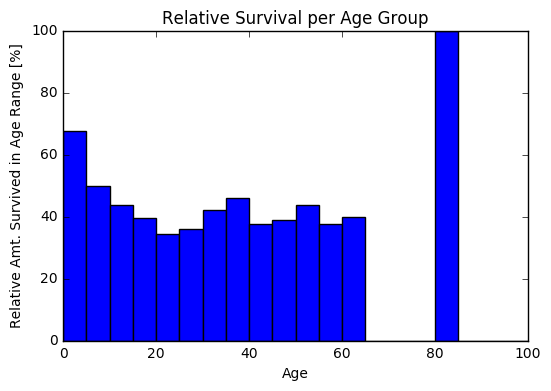

In [11]:
# Calculating the relative survival rate per bin and showing in a barchart
# During division, taking advantage of booleans being treated as 1's and 0's during additions
# This to avoid dividing by 0
binned_ages_relative_survival = binned_ages_survived / (binned_ages_all + (binned_ages_all == 0))
plt.bar(bins_ages[:-1], binned_ages_relative_survival * 100, width=5)
plt.title("Relative Survival per Age Group")
plt.xlabel("Age")
plt.ylabel("Relative Amt. Survived in Age Range [%]")

#### Conclusions
- Because the previous graph shows the amount of people declines as age increases, it's hard to come to conclusions about the higher end of the age range. Basically, if we would look at each bin being a sample, for the upper end of age, the sample size would not be large enough to say anything sensible. Look for example at the lucky 100% of 80-85 year olds being rescued, being 1 person. I conclude not much can be said about age being a predictor of survival above 60 to 65.
- Under 65 we can see the graph stays quite uniform until dropping under 10 years old when survival goes up.
- This indicates being a child was a good predictor for survival.

### Survival statistics between males/females and children/adults

I decide to take a more discrete approach, doing some more data wrangling by separating passengers into 3 groups:
- Children (age < 12)
- Male adults
- Female adults

**Records with missing age data will not be counted in these statistics**

For each pair, (male, female), (male, child), (female, child), I state the following hypotheses:
$$H_0 \rightarrow \mu_1 = \mu_2$$
$$H_A \rightarrow \mu_1 \ne \mu_2$$
With $\mu_1$ and $\mu_2$ being the population means for group 1 and 2 of each pair respectively. In other words, the null hypothesis for each pair states that survival chances for one group is not significantly different from the other group.

I then create a table showing the counts and mean survival rates for each group. Looking at other statistics doesn't make much sense, since Survival is a discrete either/or value, so medians, min/max or SD wouldn't provide insight.

As confirmation afterwards, I also check whether I can safely assume I can throw male and female children into one container by looking at the difference in survival rates between the two.

In [12]:
# Separating passengers into 3 groups (men, women, children) and calculating their counts and means
def mwc(row):
    # Filtering out NaN ages
    if isnan(row["Age"]):
        return float('nan')
    elif row["Age"] < 12:
        return "child"
    else:
        return row["Sex"]
titanic["mwc"] = titanic.apply(mwc, axis=1)

# Calculating some stats
titanic_mwc_stats = pd.concat([titanic.groupby("mwc")["Survived"].count(), titanic.groupby("mwc")["Survived"].mean()], axis=1)
titanic_mwc_stats.columns = ["n", "mean"]
titanic_mwc_stats["n_survived"] = titanic_mwc_stats["n"] * titanic_mwc_stats["mean"]
titanic_mwc_stats["n_not_survived"] = titanic_mwc_stats["n"] - titanic_mwc_stats["n_survived"]
titanic_mwc_stats

,n,mean,n_survived,n_not_survived
mwc,,,,
child,68,0.573529,39.0,29.0
female,229,0.777293,178.0,51.0
male,417,0.175060,73.0,344.0


In [13]:
# Checking whether child survival rates are roughly equal among girls and boys
titanic.groupby(["mwc","Sex"])["Survived"].mean().loc["child"]

Sex
female    0.593750
male      0.555556
Name: Survived, dtype: float64

I decide I can fairly safely assume children can be counted as one group in terms of survival rates (59% for girls vs 56% for boys).

I now want to determine the significance of the differences between these values for men, women and children. Since this is nominal data, I'll perform several $\chi^2$ tests to draw conclusions.

In [14]:
from scipy.stats import chi2_contingency
def chi_square(key1, key2):
    observed = titanic_mwc_stats.loc[[key1, key2]][["n_survived", "n_not_survived"]]
    k = min(len(observed.index), len(observed.columns))
    res = chi2_contingency(observed, correction=False)
    chi_sq, p, dof = res[0:3]
    total = sum(observed.sum())
    effect_size=sqrt(chi_sq/((k-1)*total))
    print("Chi^2 for {key1} and {key2} is {chi_sq} for {dof} dof\nEffect size={effect_size}\nP={p}\n"\
          .format(key1=key1, key2=key2, chi_sq=chi_sq, dof=dof, effect_size=effect_size, p=p))

In [15]:
# Calculating Chi^2 for each pair
chi_square("male", "female")
chi_square("male", "child")
chi_square("female", "child")

Chi^2 for male and female is 225.663747169 for 1 dof
Effect size=0.591036958253
P=5.26072295942e-51

Chi^2 for male and child is 52.2696911227 for 1 dof
Effect size=0.328287311689
P=4.83783920809e-13

Chi^2 for female and child is 11.0612059257 for 1 dof
Effect size=0.192984760007
P=0.000881527897148



#### Conclusions

For all 3 pair we can **reject the null** for an $\alpha$ level of at least 0.001 (all 3 P values are below 0.001):
- Females had a significantly higher chance of survival (78%) than males (18%), effect size being large according to Cohen ($> 0.50$)
- Females had a significantly higher chance of survival (78%) than children (57%), effect size being small ($> 0.10$)
- Children had a significantly higher chance of survival (57%) than males (18%), effect size being medium ($> 0.30$)

### Data analysis by title

I'd now like to divide the dataset into groups by title (Mr, Mrs, Miss, ...)

I'll compare the age distribution between titles, going a bit more in depth for married vs unmarried women (Mrs, Miss)

In [16]:
# Preparing the groups, checking how many passengers there are per title
titanic_grp_title = titanic.groupby("Title")
titles = titanic["Title"].unique()
cols_of_interest = ["Survived", "Pclass", "Age", "Fare"]
titanic_grp_title["Title"].count()

Title
Capt              1
Col               2
Don               1
Dr                7
Jonkheer          1
Lady              1
Major             2
Master           40
Miss            182
Mlle              2
Mme               1
Mr              517
Mrs             125
Ms                1
Rev               6
Sir               1
the Countess      1
Name: Title, dtype: int64

A lot of titles only show up a few times, so I want to only concentrate on the titles that occur at least 10 times.

Next, I plot boxplots of ages per title, and basic statistics

Title,Master,Miss,Mr,Mrs
count,36.000000,146.000000,398.000000,108.000000
mean,4.574167,21.773973,32.368090,35.898148
std,3.619872,12.990292,12.708793,11.433628
min,0.420000,0.750000,11.000000,14.000000
25%,1.000000,14.125000,23.000000,27.750000
50%,3.500000,21.000000,30.000000,35.000000
75%,8.000000,30.000000,39.000000,44.000000
max,12.000000,63.000000,80.000000,63.000000


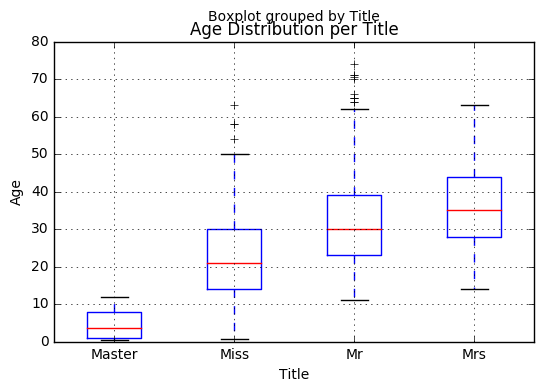

In [17]:
# Generating a list of titles that occur at least 10 times, then filtering data based on these titles
titles_often = titanic["Title"].value_counts()[titanic["Title"].value_counts() >= 10].index
titanic_filt_title = titanic[titanic["Title"].isin(titles_often)]
titanic_filt_title_stats = titanic_filt_title.groupby("Title")["Age"].describe().unstack()
display(titanic_filt_title_stats.transpose())
titanic_filt_title.boxplot(column="Age", by="Title")
plt.title("Age Distribution per Title")
plt.ylabel("Age")

According to some Wikipedia research, Master was commonly the title for boys not old enough yet to be called Mister, which shows from the data: The max value for Master is 12, whereas the min value for Mr is 11

For women, the distinction lies I assume in being married or not married, so the titles Miss and Mrs are not tied to age directly.

The legal age of marriage in the early 1900s was 12 for girls and 14 for boys. The minimum value in the Mrs category is 14 which also makes sense.

The following is a histogram comparing age distribution of married vs unmarried women.

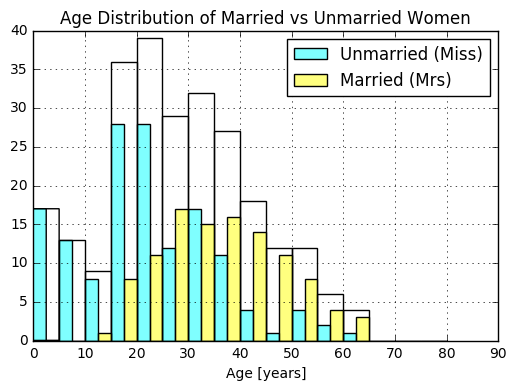

In [18]:
def get_stats(key):
    return [titanic_filt_title_stats[val].loc[key] for val in ["count", "mean", "std"]]
miss_n, miss_mean, miss_std = get_stats("Miss")
mrs_n, mrs_mean, mrs_std = get_stats("Mrs")
rng=[0,80]
bins=16
width=(max(rng) - min(rng)) / bins
titanic[titanic["Title"].isin(["Miss", "Mrs"])]["Age"].hist(fc=(1,1,1,.1),range=[0,80], bins=16, width=5)
titanic_filt_title.groupby("Title").get_group("Miss")["Age"].hist(fc=(0,1,1,.5),range=[0,80], bins=16, width=2.5, label="Unmarried (Miss)")
titanic_filt_title.groupby("Title").get_group("Mrs")["Age"].hist(fc=(1,1,0,.5),range=[0,80], bins=16, width=2.5, align="right", label="Married (Mrs)")
plt.title("Age Distribution of Married vs Unmarried Women")
plt.xlabel("Age [years]")
plt.legend()

My original idea was to perform a t-test on these distributions, which in hindsight doesn't seem useful.
- When looking at the total age distribution of Miss and Mrs combined, more were on board in their 20s up until their 40s than other age groups. This means the data gravitates towards that range on the x-axis. Not having uniformly distributed Age data means the distributions of both groups get pulled towards the region with the highest frequency.
- Children can't get married before 12 (and likely have little interest to), so they would pull the average Age for a Miss down, whereas once people are married and stay that way, then the longer they live, the more they pull the average up. All in all, I conclude that comparing means doesn't make much sense.

A few things we can observe are:
- Again, the youngest married women on board was 14
- Proportionally, the majority shifts from being unmarried to married around the age of 30
- Being single is of all ages :)

### Correlation between age and fare

Next I want to check whether there is a correlation between age and fare paid.

For this I'll generate a scatterplot for both values, and compute Pearson's r to check if there is a correlation between the two. The closer r will be to 0, the more independent both variables are.

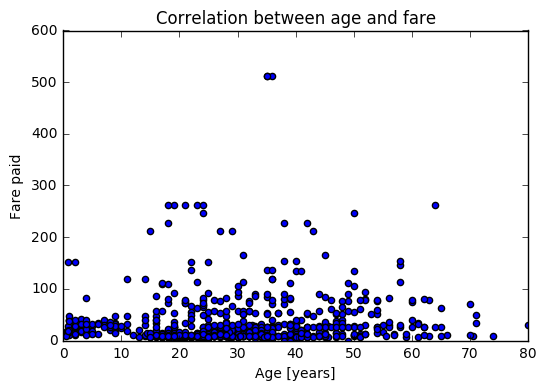

In [19]:
# plt.scatter(titanic.groupby("Title").get_group("Mr")["Age"], titanic.groupby("Title").get_group("Mr")["Fare"])
plt.scatter(titanic["Age"], titanic["Fare"])
plt.ylim(0,600)
plt.xlim(0,80)
plt.title("Correlation between age and fare")
plt.xlabel("Age [years]")
plt.ylabel("Fare paid")

In [20]:
# Calculate Pearson's r
display(titanic[["Age","Fare"]].corr())
display(len(titanic))

,Age,Fare
Age,1.000000,0.096067
Fare,0.096067,1.000000


891

According to GraphPad, this correlation for an r of 0.096 and 889 (N - 2) degrees of freedom has a P of 0.0041, meaning a 0.4% probability that fare paid and age are independend, which is very significant.

### Survival Rate based on Family Members

The following is a graph showing the survivalrate per amount of familymembers.

Family
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

([<matplotlib.axis.XTick at 0xbaf0978>,
 <a list of 11 Text xticklabel objects>)

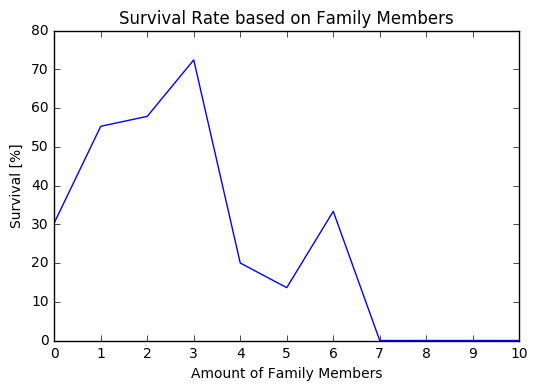

In [21]:
display(titanic.groupby("Family")["Survived"].mean())
plt.plot(titanic.groupby("Family").groups.keys(), titanic.groupby("Family")["Survived"].mean() * 100)
plt.title("Survival Rate based on Family Members")
plt.xlabel("Amount of Family Members")
plt.ylabel("Survival [%]")
plt.xticks(range(0,max(titanic.groupby("Family").groups.keys())+1,1))

As we can see, there seems to be an optimal amount of family members for survival rate, at 3 family members for a survival rate of 72.4%.

A possible explanation for this is that a few people helping eachother out is better than nobody, but after a group reaches a critical size, it becomes harder to take care of everybody. The larger groups may be unable to save loved ones, or decide to stay together behind, not surviving themselves in the process.

## Summary

Through several tests and visualizations, I've concluded the following:
- Adult females had significantly higher chances of survival than children, who had higher chances of survival than adult men
- The youngest married woman on board was 14, and married women became the majority at 30 years of age
- There is a dependency between fare paid and age
- There seemed to be an optimal amount of family members for chances of survival, being 3 people

## Limitations and Further Research

This report only explores the dataset from a few angles, and obviously there are many more questions that could be asked and connections in the data that could be explored, e.g.:
- More influences on survival rate
    - Passenger class
    - Amount of siblings and spouse versus parents and children separately instead of together
    - Having a cabin or not,
    - ...
- Figuring out the ticket numbering system
- ...

The dataset in itself is also quite limited as all the data we have about the people on board is limited to information found on their ID and ticket, and some numbers on personal relations. One thing I would have liked to see was, for family members (parents, children, spouse and siblings), what their names were. That way we could investigate whether, for example, people tended to survive with their entire group intact.

Since this was, though tragic, a great moment to learn about human perseverence and how people react in a disaster situation, it would be great to have more datasets about the passengers on board to cross reference. To give small example, if we had more personal information such as profession about each person, people could be categorized by type of work and we'd have another possible influence for survival to check for.

---
## References

- Looked up what the ticket numbers meant: https://www.kaggle.com/c/titanic/discussion/11127#81589
- Refreshing my memory on how to add a new column in a dataframe with results data: http://stackoverflow.com/questions/14059094/i-want-to-multiply-two-columns-in-a-pandas-dataframe-and-add-the-result-into-a-n
- How to remove a pandas column: http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.drop.html
- Lookup how to get a table for a specific grouped value: http://stackoverflow.com/questions/22691010/how-to-print-a-groupby-object
- Calculated frequencies from a histogram can be stored: http://stackoverflow.com/questions/19442224/getting-information-for-bins-in-matplotlib-histogram-function
- pandas unstack function, when I wanted to display my gender/children data more clearly: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html
- Concat function to create a dataframe of 2 Series: http://stackoverflow.com/questions/18062135/combining-two-series-into-a-dataframe-in-pandas
- Giving a series a name: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.rename.html
- Manipulating pandas dataframe index: http://pandas.pydata.org/pandas-docs/stable/advanced.html
- Refreshing my memory for chi^2 tests: http://stattrek.com/chi-square-test/independence.aspx?Tutorial=AP
- Information about people's titles: https://en.wikipedia.org/wiki/Title
- How to filter groups by expression: http://stackoverflow.com/questions/34690756/pandas-remove-group-from-the-data-when-a-value-in-the-group-meets-a-required-co
- How to filter a dataframe based on one of multiple values: http://stackoverflow.com/questions/12096252/use-a-list-of-values-to-select-rows-from-a-pandas-dataframe
- Legal age to marry in the early 1900s: http://www.genesreunited.co.uk/boards/board/genealogy_chat/thread/863837
- Pandas function for calculating Pearson's r: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html
- How to get a list of names of generated groups: http://stackoverflow.com/questions/28844535/python-pandas-groupby-get-list-of-groups
- Research about passengers that did not have embarkation data: https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html
- Research about the LINE tickets: https://www.encyclopedia-titanica.org/titanic-survivor/william-henry-tornquist.html
- How to change text on matplotlib graphs: http://matplotlib.org/users/text_intro.html